In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize



class EinsteinFormula():
    
    def __init__(self , et , name):
        
        self.name = name #name of the element
        self.w = 0 #angular frequency of harmonic oscillator rad/s 
        self.kb = 1.3e-23 #boltzmann constant J/k
        self.ET = et #einstein temperature kelivin
        self.t_s = np.arange(1,2*self.ET,0.1) #temperature series in kelvin - 1- et K with 0.01K increment 
        self.h = 1.054e-34 #plancks constant h-bar
        self.cv = [] #specific heat at constant volume series in J/kg
        self.N = 6.023e23 #avagadros number , number of atoms in 1 mol of a substance
        
    def CalculateW(self):
        
        self.w = self.ET*self.kb/self.h
        self.f = self.w/2*np.pi
        
    def CalculateSH(self):
        
        x = self.ET/self.t_s
        self.cv = self.N*self.kb*(x**2)*np.exp(x)/(np.exp(x)-1)**2
        self.cp = self.cv + 8.314 #specific heat at constant pressure 
    
                                
    def Plot(self):
        
        self.CalculateW()
        self.CalculateSH()
        #print(self.w)
        #print(self.SpecificHeat)
        plt.figure(figsize=(30,10))
        plt.style.use('ggplot')
        plt.title("Cv over T/ET for {}".format(self.name))
                
        plt.plot(self.t_s/self.ET , self.cv)
        
        
        plt.xlabel("T/ET")
        plt.ylabel("specific heat in J/kg")
        plt.show()
        

In [2]:

def SinglePoint(T, N , kb , ET ): #Caclulates specific heat using Einsteins method for a single Data Point
        
        return kb*N*((ET/T)**2)*(np.exp(ET/T)/(np.exp(ET/T)-1)**2)

f:\program files (x86)\python\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in exp
f:\program files (x86)\python\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in multiply
f:\program files (x86)\python\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in square
f:\program files (x86)\python\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


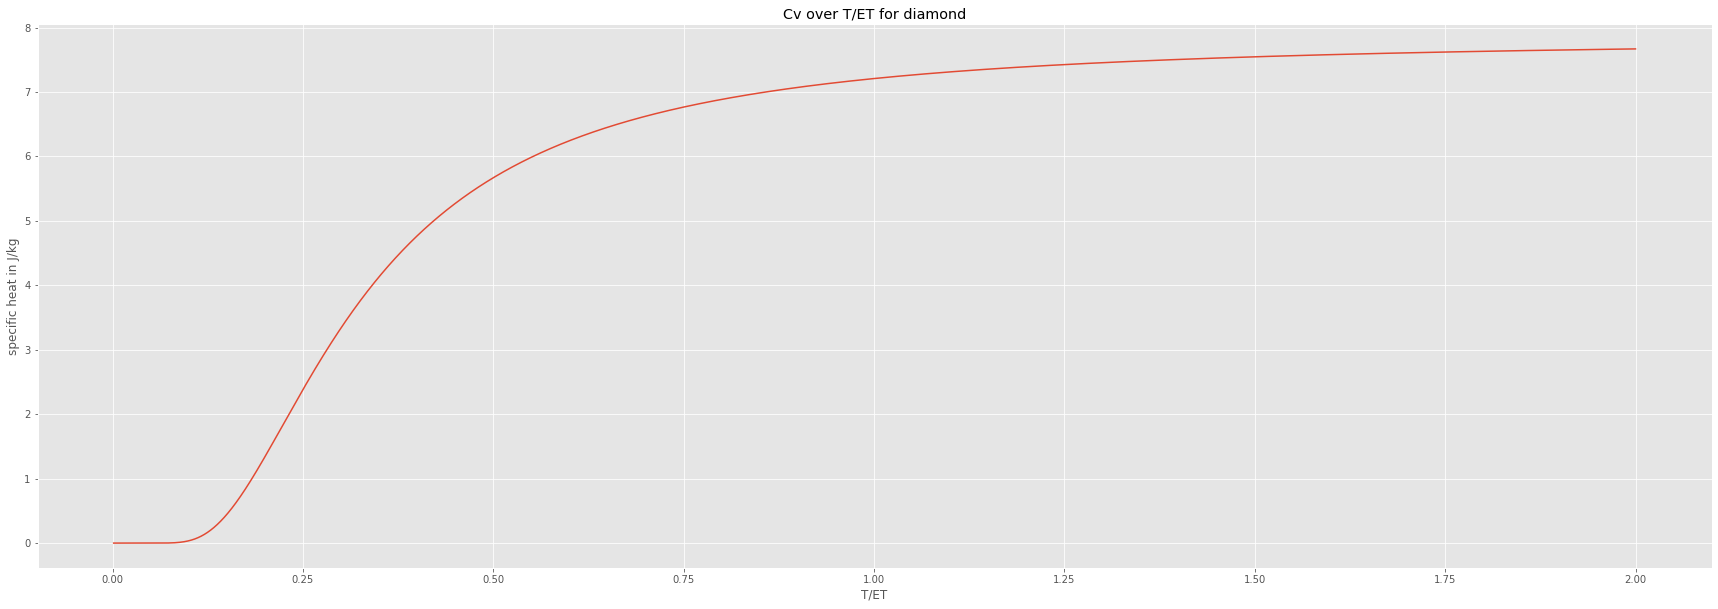

In [3]:
#plotting einstein solid specific heat for diamond 

e = EinsteinFormula(1320, "diamond") #einstien temperature for diamond is 1320K
e.Plot()


f:\program files (x86)\python\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in square
  This is separate from the ipykernel package so we can avoid doing imports until
f:\program files (x86)\python\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
f:\program files (x86)\python\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
f:\program files (x86)\python\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


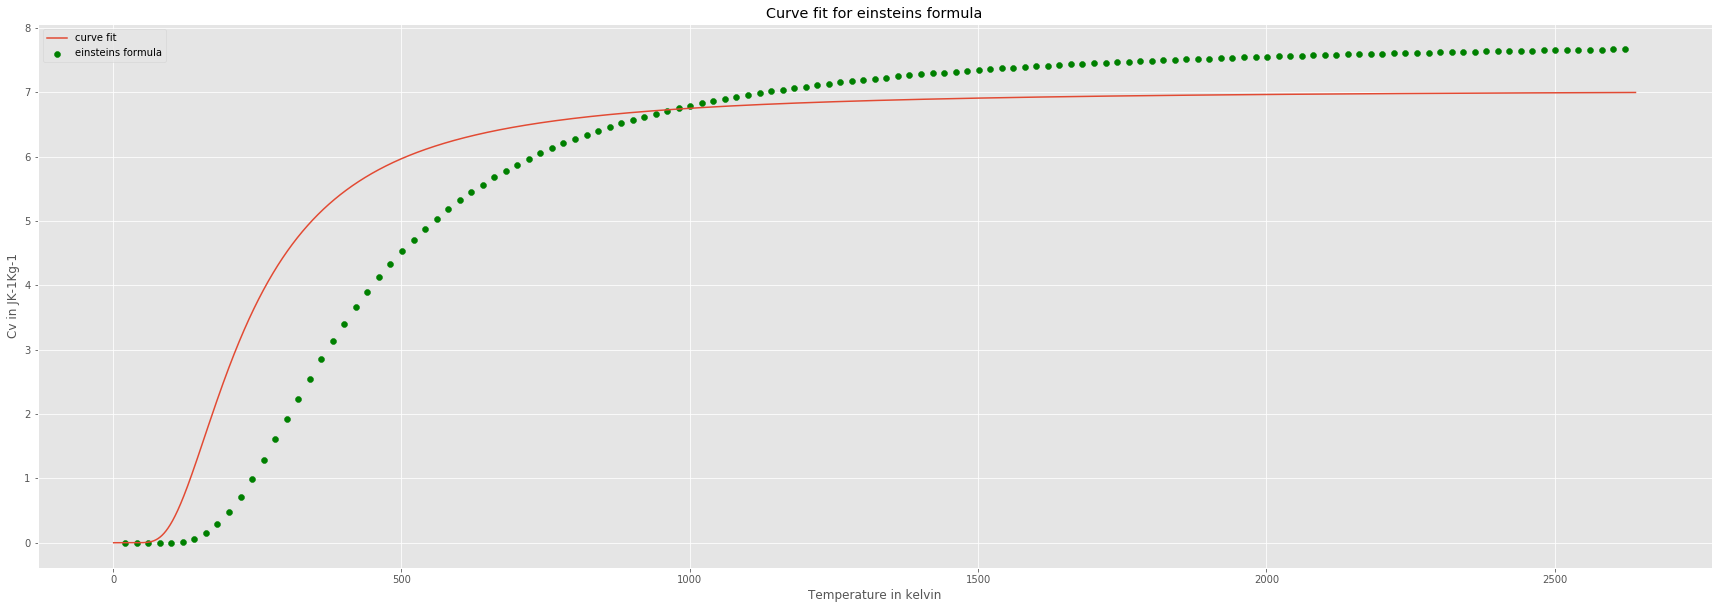

In [4]:
#curve fitting data from Einsteins formula 

from scipy.optimize import curve_fit
import math


cv_list_no_nan = [0 if math.isnan(x) else x for x in e.cv]

params , pcov = curve_fit(SinglePoint , e.t_s , cv_list_no_nan)

new_cv = [SinglePoint(t , *params) for t in e.t_s]

plt.figure(figsize=(30,10))
plt.title("Curve fit for einsteins formula")
plt.scatter(e.t_s[::200] , e.cv[::200] , color = 'green' , label='ro')
plt.plot(e.t_s , new_cv)
plt.legend(["curve fit" , "einsteins formula"])
plt.xlabel("Temperature in kelvin")
plt.ylabel("Cv in JK-1Kg-1")
plt.show()


In [5]:
from scipy import integrate

class DebyeFormula():
    
    def __init__(self , dt , name):
        
        self.dt = dt #debye temperate in kelvin
        self.w = 0 #debye frequency 
        self.cv = [] #specific heat at constant volume
        self.t_s = np.arange(1 , 2*self.dt , 0.1) #temperature series between 1 , dt with 0.1k incrememt
        self.h = 1.054e-34 #plancks constant h-bar
        self.kb =  1.3e-23 #boltzmann constant J/k
        self.xd  = self.dt/self.t_s
        self.N = 6.023e23 #avagadros number , number of atoms in 1 mol of a substance
        self.name = name
        
    def CalculateW(self):
        
        self.w = self.h*self.dt/self.kb
    
    
    def CalculateSH(self):
        
        self.CalculateW()
        
        func = lambda x: ((x**4)*np.exp(x)/(np.exp(x)-1)**2)
        
        for t in self.t_s:
            
            xd = self.dt/t
            integral_ = integrate.quad(func ,0 , xd)
            cv_ = 3*8.314*((1/xd)**3)*integral_[0]
            self.cv.append(cv_)
            
    def Plot(self):
        
        self.CalculateSH()
        plt.style.use('ggplot')
        plt.figure(figsize=(30,10))
        plt.title("Cv over T/DT for {} in JK-1Kg-1".format(self.name))
        plt.xlabel("T/DT")
        plt.ylabel("Cv")
        plt.plot(self.t_s/self.dt, self.cv)
        plt.show()

f:\program files (x86)\python\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in double_scalars
f:\program files (x86)\python\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in exp
f:\program files (x86)\python\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars
f:\program files (x86)\python\lib\site-packages\ipykernel_launcher.py:31: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
f:\program files (x86)\python\lib\site-packages\ipykernel_launcher.py:31: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one wil

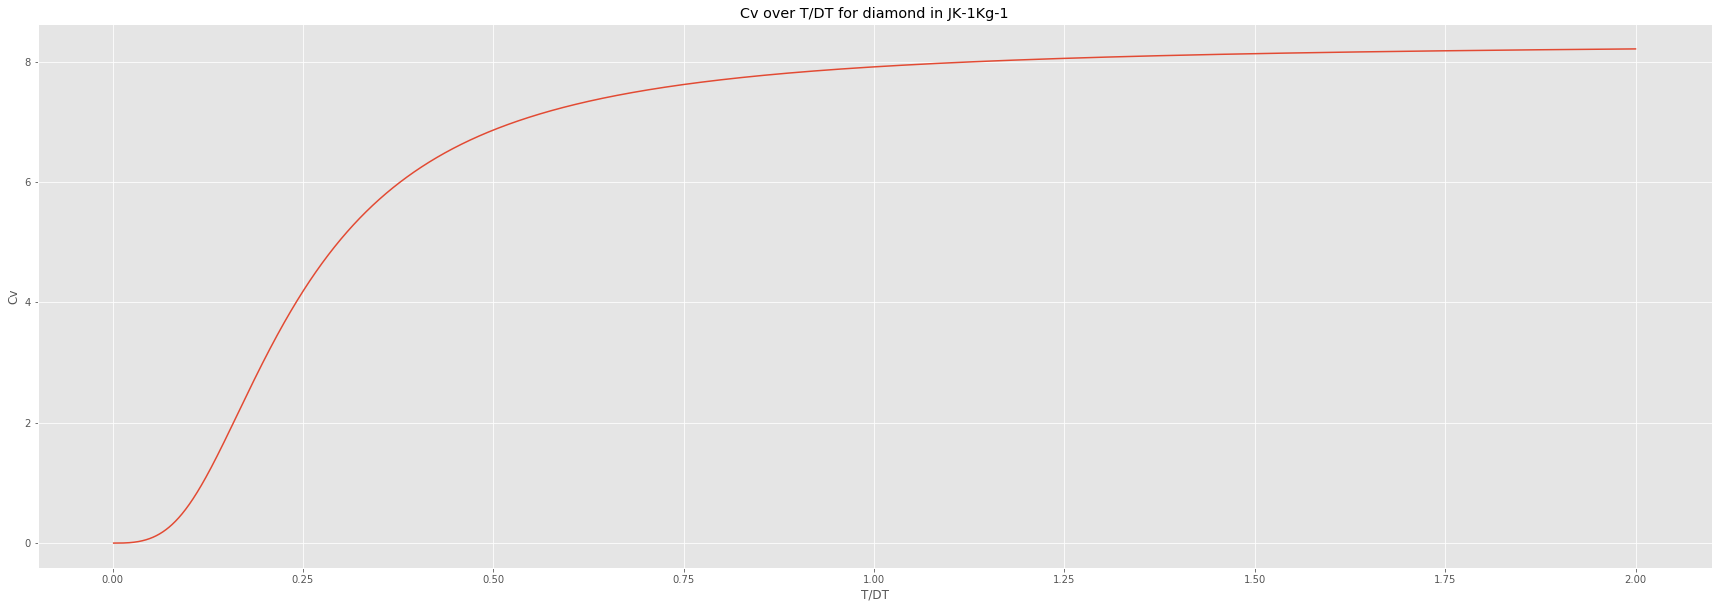

In [6]:
d = DebyeFormula(1150, "diamond")
d.Plot()

In [7]:
def SinglePointDebye(T , DT ): #calculating specific heat of a solid at a single point
    
    func = lambda x: ((x**4)*np.exp(x)/(np.exp(x)-1)**2)
    xd = DT/T
    integral_ = integrate.quad(func , 0 , xd)
    
    return 3*8.314*((1/xd)**3)*integral_[0]
    

In [8]:
print(SinglePointDebye(2993 , 273))

8.310542494697895


In [9]:
#fitting debye formula curve

cv_no_nan = [0 if math.isnan(x) else x for x in d.cv]

params , pcov = curve_fit(SinglePointDebye , d.t_s , cv_no_nan)

new_cv = [SinglePointDebye(t , *params) for t in d.t_s]

plt.figure(figsize = (30 , 10))
plt.title("curve fit for debye formula")
plt.plot(new_cv , d.t_s)
plt.scatter(d.c_v[::200] , d.t_s[::200])
plt.xlabel("temperature in kelvin")
plt.ylabel("cv in JK-1Kg-1 ")

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

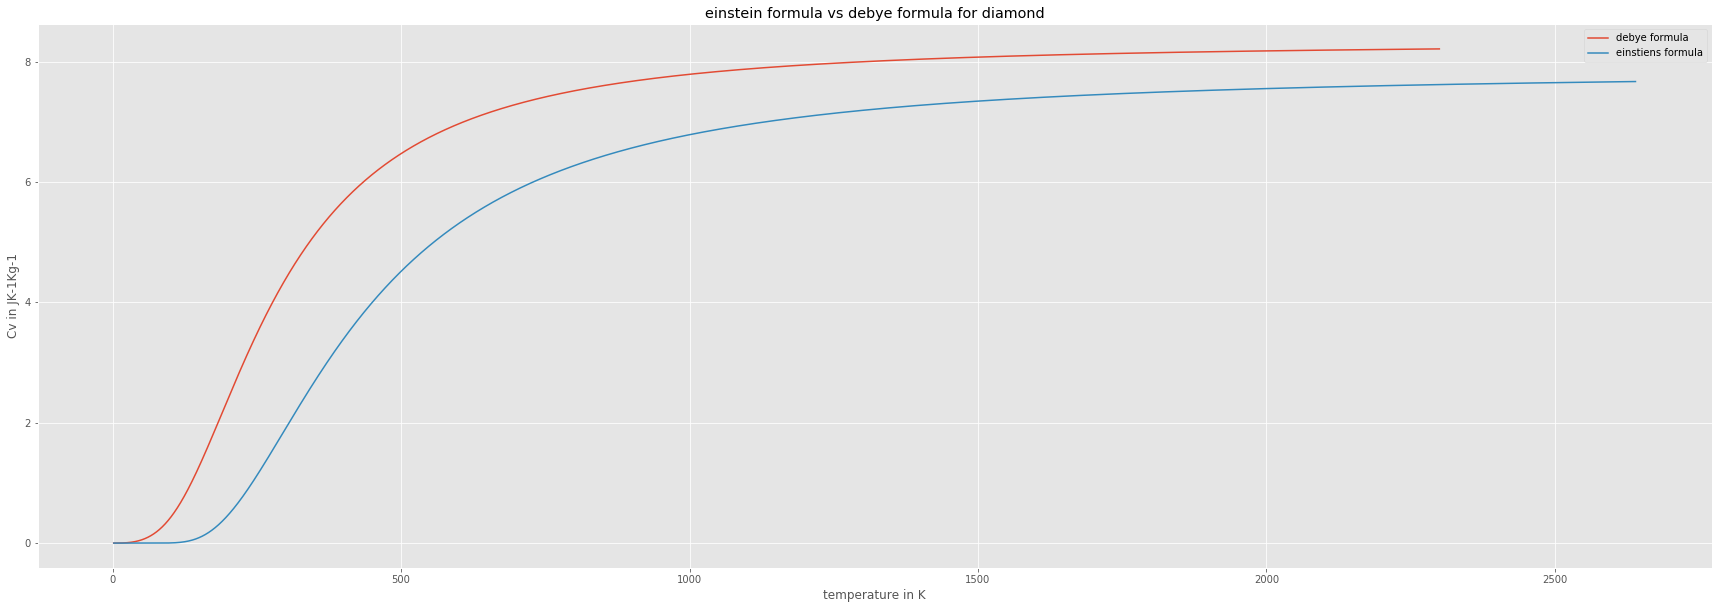

In [11]:
plt.figure(figsize=(30,10))
plt.plot(d.t_s , d.cv)
plt.plot(e.t_s , e.cv)
plt.title("einstein formula vs debye formula for diamond")
plt.xlabel("temperature in K")
plt.ylabel("Cv in JK-1Kg-1")
plt.legend(["debye formula" , "einstiens formula"])

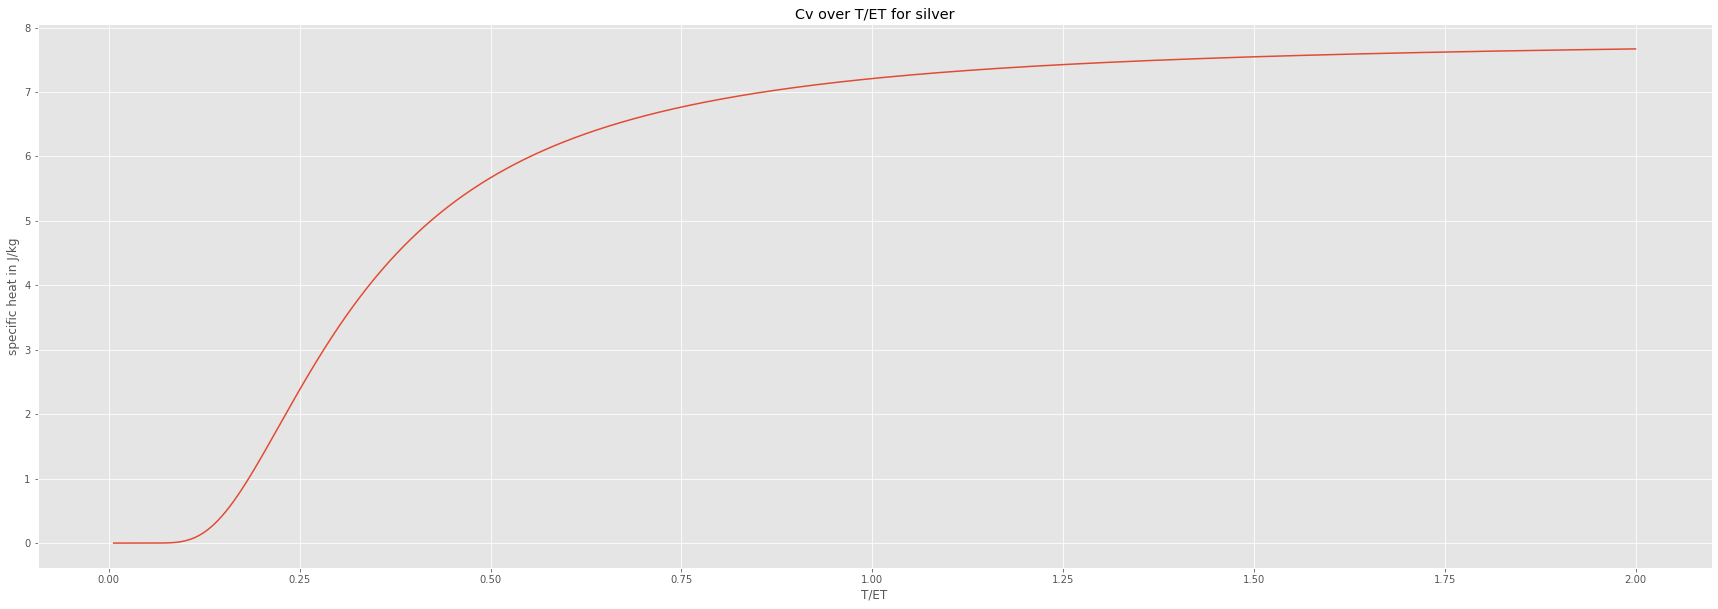

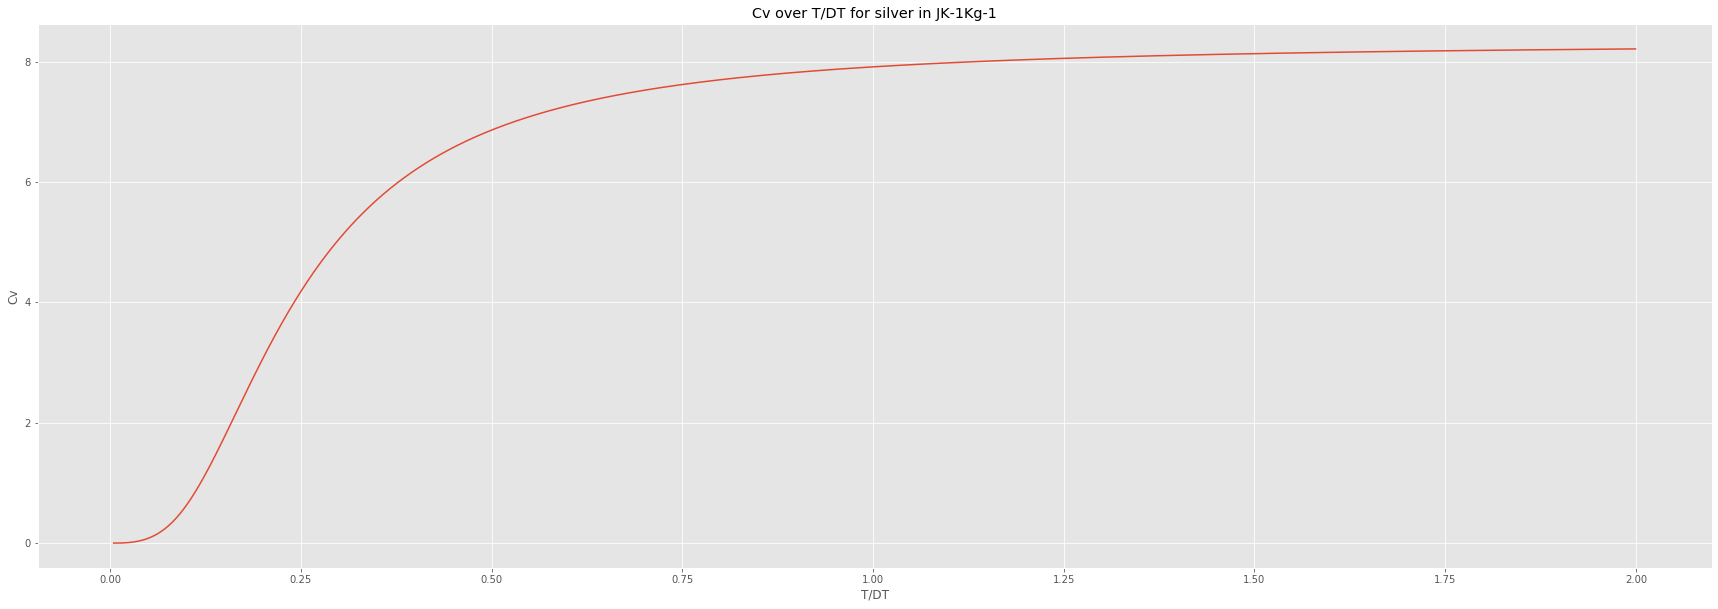

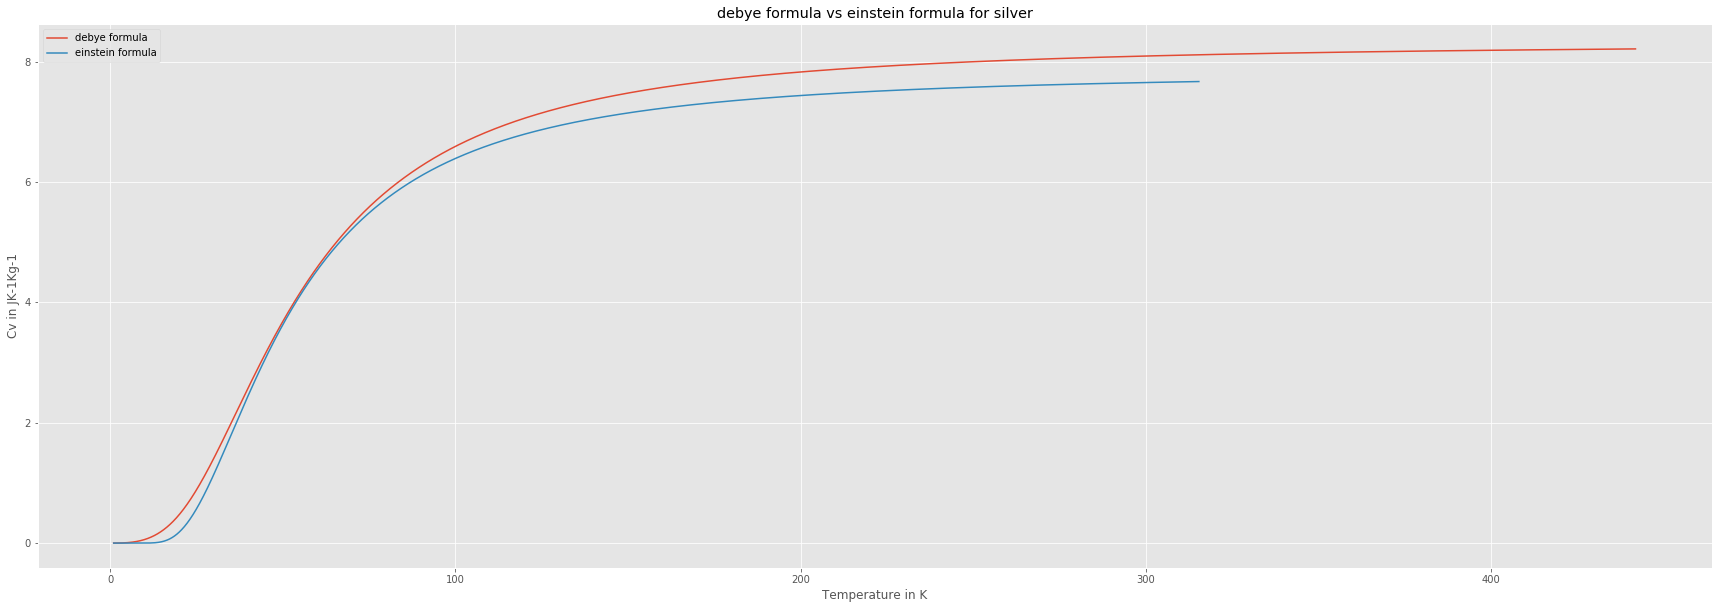

In [10]:
#plotting Einstein formula and Debye formula for silver 


def PlotDE(ET , DT , name): #function to plot debye and einstein formula for any given element 
    
    e_s = EinsteinFormula(ET, name)
    d_s = DebyeFormula(DT , name)
    e_s.Plot()
    d_s.Plot()

    plt.figure(figsize = (30,10))

    plt.title("debye formula vs einstein formula for {}".format(name))
    plt.plot(d_s.t_s , d_s.cv)
    plt.plot(e_s.t_s , e_s.cv)
    plt.legend(["debye formula" , "einstein formula"])
    plt.xlabel("Temperature in K")
    plt.ylabel("Cv in JK-1Kg-1")
    
#Einstein temperature for silver = 157.707K
#Debye temperature for silver = 221K at room temperature
    
PlotDE(157.707 , 221 , "silver") #for silver

In [ ]:
#integration test scipy

from scipy import integrate

import numpy as np

func = lambda x: x**2

integral = integrate.quad(func , 0 , 2)
print(integral)